In [3]:
!pip install -q pandas
!pip install -q seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

print(tf.__version__)

2.3.0


In [5]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 5us/step


'/root/.keras/datasets/auto-mpg.data'

In [10]:
pd.read_csv??

In [20]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                         na_values="?", comment="\t",    # comment: If found at the beginning of a line, the line will be ignored altogether.
                         sep=" ", skipinitialspace=True) # skipinitialspace: Skip spaces after delimiter 
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [21]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [22]:
dataset = dataset.dropna()

In [23]:
origin = dataset.pop("Origin")

In [24]:
for idx, name in enumerate(["USA", "Europe", "Japan"]):
    dataset[name] = (origin == (idx + 1)) * 1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [26]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

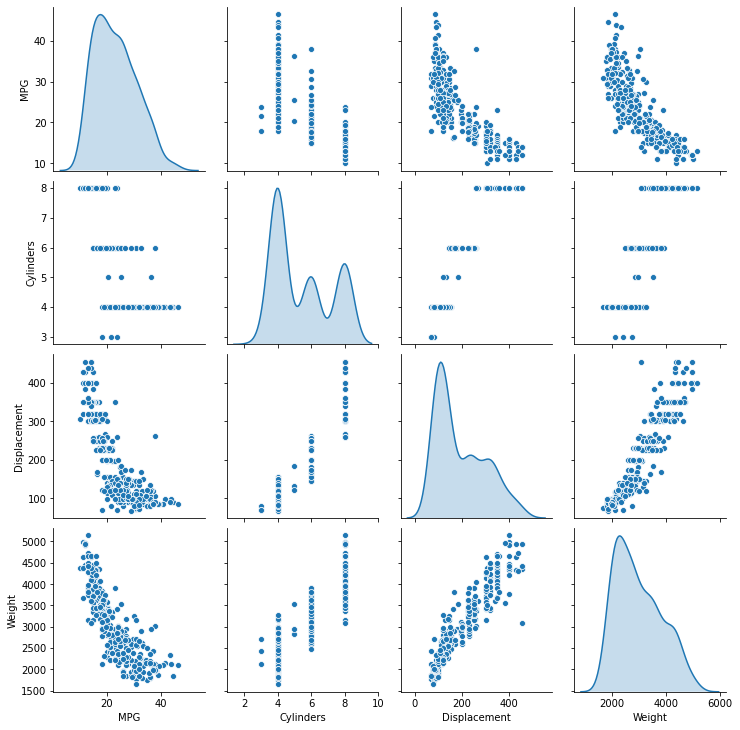

In [27]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [28]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [29]:
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

In [31]:
train_stats['mean']

Cylinders          5.477707
Displacement     195.318471
Horsepower       104.869427
Weight          2990.251592
Acceleration      15.559236
Model Year        75.898089
USA                0.624204
Europe             0.178344
Japan              0.197452
Name: mean, dtype: float64

In [32]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [33]:
normed_test_data.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
369,-0.869348,-0.798593,-0.442811,-0.705359,0.875068,1.660094,0.774676,-0.465148,-0.495225
375,-0.869348,-0.865687,-0.810302,-1.197124,-0.092942,1.660094,-1.286751,2.143005,-0.495225
382,-0.869348,-0.836932,-0.915299,-0.883106,0.480693,1.660094,-1.286751,-0.465148,2.012852
384,-0.869348,-0.999874,-0.994047,-1.214899,0.050467,1.660094,-1.286751,-0.465148,2.012852
396,-0.869348,-0.721914,-0.679055,-0.432815,1.090181,1.660094,0.774676,-0.465148,-0.495225


In [34]:
layers.Dense??

In [35]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss="mse",
                 optimizer=optimizer,
                 metrics=['mae', 'mse']) # output 하나에 두 가지 메트릭을 적용.
                #metrics=['accuracy', ['mae', 'mse']] 이렇게 작성할 경우 output이 2개
    return model

In [37]:
model = build_model()

In [38]:
model.compile??

In [44]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch.to_numpy())
example_result

array([[ 0.20296735],
       [ 0.20058718],
       [-0.03339741],
       [ 0.20531097],
       [-0.11829994],
       [ 0.18886624],
       [-0.10269643],
       [ 0.09374512],
       [ 0.11545862],
       [-0.13791797]], dtype=float32)

In [47]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
EPOCHS = 1000

history = model.fit(
    normed_train_data.to_numpy(), train_labels.to_numpy(),
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.692436,1.073684,2.692436,9.152814,2.381216,9.152814,995
996,2.647111,1.037176,2.647111,9.427661,2.364645,9.427661,996
997,2.703141,1.075092,2.703141,9.541059,2.392341,9.541059,997
998,2.591163,1.033119,2.591163,9.616157,2.394885,9.616157,998
999,2.688981,1.036554,2.688981,9.678205,2.391558,9.678205,999


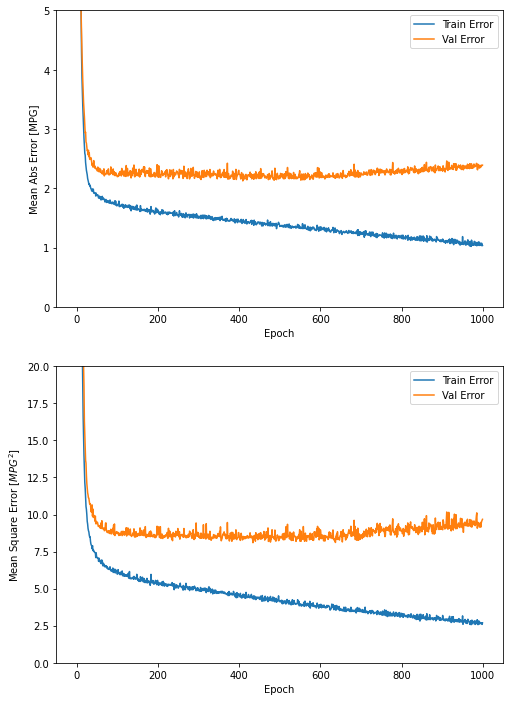

In [49]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


......................................................

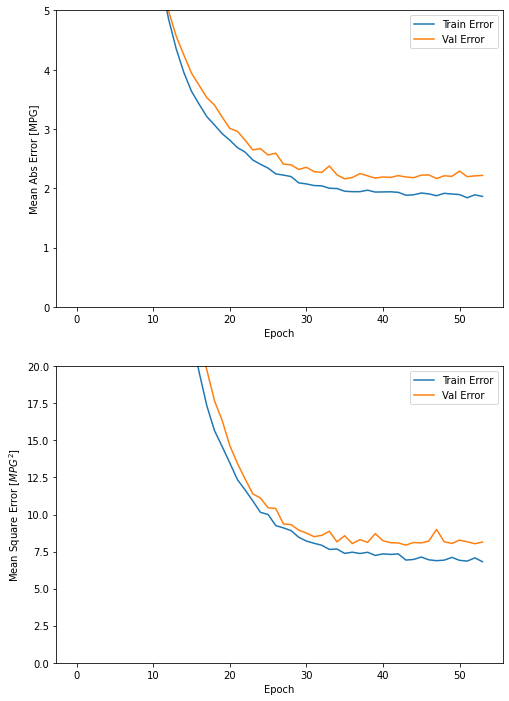

In [51]:
# 학습 향상이 안 일어날 시 자동으로 멈추는 코드
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data.to_numpy(), train_labels.to_numpy(), epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [53]:
loss, mae, mse = model.evaluate(normed_test_data.to_numpy(), test_labels.to_numpy(), verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.3435 - mae: 1.7993 - mse: 5.3435
테스트 세트의 평균 절대 오차:  1.80 MPG
